In [3]:
import json
import os
import sys
sys.path.append('../')  ### to detect libraries in the parent directory
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from collections import defaultdict
from libraries.utils import *
from libraries.exeint import exeInt

In [4]:
############ configuration ################
############################################

CODE = 'theft_protection'       ### application (code)
BEHAVIOUR_FAULTY = 'faulty_data'            ### normal, faulty_data
BEHAVIOUR_NORMAL = 'normal'            ### normal, faulty_data
THREAD = 'single'           ### single, multi
VER = 3                     ### format of data collection

base_dir = '../../trace_data' ### can be replaced with 'csv', 'exe_plot', 'histogram'
normalbase_path = base_dir+f'/{CODE}/{THREAD}_thread/version_{VER}/{BEHAVIOUR_NORMAL}'
faultybase_path = base_dir+f'/{CODE}/{THREAD}_thread/version_{VER}/{BEHAVIOUR_FAULTY}'

print(normalbase_path)
print(faultybase_path)

../../trace_data/theft_protection/single_thread/version_3/normal
../../trace_data/theft_protection/single_thread/version_3/faulty_data


In [5]:
train_base_path = os.path.join(normalbase_path, 'train_data')
train_data_path = [os.path.join(train_base_path, x) for x in os.listdir(train_base_path)]
train_varlist_path = os.listdir(normalbase_path)
train_varlist_path = [os.path.join(normalbase_path, x) for x in train_varlist_path if 'varlist' in x]

######### get paths #######################
paths_log, paths_traces, varlist_path, paths_label = get_paths(faultybase_path)

### remove.Ds_store from all lists
train_data_path = [x for x in train_data_path if '.DS_Store' not in x]
train_varlist_path = [x for x in train_varlist_path if '.DS_Store' not in x]
paths_log = [x for x in paths_log if '.DS_Store' not in x]
paths_traces = [x for x in paths_traces if '.DS_Store' not in x]
varlist_path = [x for x in varlist_path if '.DS_Store' not in x]
paths_label = [x for x in paths_label if '.DS_Store' not in x]

paths_log.sort()
paths_traces.sort()
varlist_path.sort()
paths_label.sort()

# print(paths_log)
# print(paths_traces)
# print(varlist_path)
# print(paths_label)

test_data_path = paths_traces
test_label_path = paths_label

print(train_data_path)
print(test_data_path)
print(test_label_path)


['../../trace_data/theft_protection/single_thread/version_3/normal/train_data/interval_1250_2000.json', '../../trace_data/theft_protection/single_thread/version_3/normal/train_data/interval_2050_2300.json', '../../trace_data/theft_protection/single_thread/version_3/normal/train_data/interval_150_900.json', '../../trace_data/theft_protection/single_thread/version_3/normal/train_data/interval_0_110.json']
['../../trace_data/theft_protection/single_thread/version_3/faulty_data/trace_trial1', '../../trace_data/theft_protection/single_thread/version_3/faulty_data/trace_trial2', '../../trace_data/theft_protection/single_thread/version_3/faulty_data/trace_trial3']
['../../trace_data/theft_protection/single_thread/version_3/faulty_data/labels/trace_trial1_labels.json', '../../trace_data/theft_protection/single_thread/version_3/faulty_data/labels/trace_trial2_labels.json', '../../trace_data/theft_protection/single_thread/version_3/faulty_data/labels/trace_trial3_labels.json']


In [6]:
varlist_path

['../../trace_data/theft_protection/single_thread/version_3/faulty_data/varlist_trial1.json',
 '../../trace_data/theft_protection/single_thread/version_3/faulty_data/varlist_trial2.json',
 '../../trace_data/theft_protection/single_thread/version_3/faulty_data/varlist_trial3.json']

In [7]:
############# check varlist is consistent ############
############# only for version 3 ######################

if VER == 3 or VER == 4:
    check_con, _ = is_consistent([train_varlist_path[0]]+ varlist_path) ### compare with train varlist

    if check_con != False:
        to_number = read_json(varlist_path[0])
        from_number = mapint2var(to_number)
    else:
        ### load normal varlist
        print('loading normal varlist')
        to_number = read_json(train_varlist_path[0])
        from_number = mapint2var(to_number)

varlist 1 is consistent with varlist 0
varlist 2 is consistent with varlist 0
varlist 3 is consistent with varlist 0


In [8]:
to_number = read_json(train_varlist_path[0])
from_number = mapint2var(to_number)

In [9]:
############ Get variable list ######################
sorted_keys = list(from_number.keys())
sorted_keys.sort()
var_list = [from_number[key] for key in sorted_keys]   ### get the variable list
# print(var_list)

## EI Training

In [10]:
### initialize exeinz
ei = exeInt()

In [11]:
train_data_path

['../../trace_data/theft_protection/single_thread/version_3/normal/train_data/interval_1250_2000.json',
 '../../trace_data/theft_protection/single_thread/version_3/normal/train_data/interval_2050_2300.json',
 '../../trace_data/theft_protection/single_thread/version_3/normal/train_data/interval_150_900.json',
 '../../trace_data/theft_protection/single_thread/version_3/normal/train_data/interval_0_110.json']

In [12]:
### get execution intervals for all variables

exe_list, filewise_exe_list = ei.get_exeint(train_data_path)

../../trace_data/theft_protection/single_thread/version_3/normal/train_data/interval_1250_2000.json
../../trace_data/theft_protection/single_thread/version_3/normal/train_data/interval_1250_2000.json
dict_keys([13, 14, 15, 6, 7, 8, 9, 10, 11, 12])
13 253738 257970
13 257970 263253
13 263253 268536
13 268536 273818
13 273818 278049
13 278049 283332
13 283332 288613
13 288613 293898
13 293898 298131
13 298131 303414
13 303414 308697
13 308697 312929
13 312929 318213
13 318213 323495
13 323495 328781
13 328781 333012
13 333012 338295
13 338295 343579
13 343579 348864
13 348864 353097
13 353097 358381
13 358381 363664
13 363664 367898
13 367898 373183
13 373183 378469
13 378469 383751
13 383751 387987
13 387987 393270
13 393270 398554
13 398554 403839
14 253743 257974
14 257974 263257
14 263257 268540
14 268540 273822
14 273822 278053
14 278053 283337
14 283337 288619
14 288619 293903
14 293903 298135
14 298135 303418
14 303418 308701
14 308701 312934
14 312934 318217
14 318217 323500
14 3

In [13]:
################## methods to detect outliers based on execution intervals ####################

############ calculate dynamic thresholds ############
thresholds = ei.get_dynamicthresh(exe_list)

############ train lof model ################
lof_models = ei.train_lof(exe_list)

######### save thresholds and lof models ############
### visualize the thresholds for varlist
thresholds_var = {}
for key in thresholds.keys():
    print('key:', key)
    thresholds_var[from_number[key]] = thresholds[key]

assert len(thresholds_var) == len(thresholds)
thresholds_var
save_json(thresholds_var, os.path.join(faultybase_path, 'thresholds.json'))

13
value: 4.2 prob: 0.28169014084507044
value: 5.3 prob: 0.7183098591549296
14
value: 4.2 prob: 0.28169014084507044
value: 5.3 prob: 0.7183098591549296
15
value: 4.2 prob: 0.2857142857142857
value: 5.3 prob: 0.7142857142857143
6
value: 1.1 prob: 1.0
7
value: 1.1 prob: 1.0
8
value: 1.1 prob: 1.0
9
value: 1.1 prob: 1.0
10
value: 4.2 prob: 0.2676056338028169
value: 5.3 prob: 0.7323943661971831
11
value: 4.2 prob: 0.2714285714285714
value: 5.3 prob: 0.7285714285714285
12
value: 4.2 prob: 0.2714285714285714
value: 5.3 prob: 0.7285714285714285
0
value: 0.0 prob: 1.0
1
value: 0.0 prob: 1.0
2
value: 0.0 prob: 1.0
3
value: 0.0 prob: 1.0
4
value: 0.0 prob: 1.0
5
value: 0.0 prob: 1.0
key: 13
key: 14
key: 15
key: 6
key: 7
key: 8
key: 9
key: 10
key: 11
key: 12
key: 0
key: 1
key: 2
key: 3
key: 4
key: 5


In [14]:
thresholds_var

{'1_0_main_g_ack': [4.1, 5.4],
 '1_0_main_events': [4.1, 5.4],
 '1_control_update_rxmsg_drop': [4.1, 5.4],
 '1_0_main_i': [1.0, 1.2],
 '1_0_sense_temperature': [1.0, 1.2],
 '1_0_main_temperature': [1.0, 1.2],
 '1_control_updatedata_cls.sensor_data': [1.0, 1.2],
 '1_control_readdata_0': [4.1, 5.4],
 '1_0_loracom_data': [4.1, 5.4],
 '1_control_update_txmsg_0': [4.1, 5.4],
 '1_0_main_ow': [0.0, 0.1],
 '1_0_main_temp': [0.0, 0.1],
 '1_0_main_lora': [0.0, 0.1],
 '1_0_main_s': [0.0, 0.1],
 '1_0_main_com_timer': [0.0, 0.1],
 '1_control_init_timer0_0': [0.0, 0.1]}

## Replicate Runtime Detection

In [15]:
from_number

{13: '1_0_main_g_ack',
 12: '1_control_update_txmsg_0',
 2: '1_0_main_lora',
 8: '1_0_main_temperature',
 0: '1_0_main_ow',
 14: '1_0_main_events',
 4: '1_0_main_com_timer',
 15: '1_control_update_rxmsg_drop',
 11: '1_0_loracom_data',
 10: '1_control_readdata_0',
 1: '1_0_main_temp',
 3: '1_0_main_s',
 9: '1_control_updatedata_cls.sensor_data',
 7: '1_0_sense_temperature',
 6: '1_0_main_i',
 5: '1_control_init_timer0_0'}

In [32]:
#### Detect anomalies in faulty traces
DIFF_VAL = 5
all_tp = []
all_fp = []
all_fn = []
all_detections = [] ### format [file1_detection, file2_detection] -> file1_detection: [(state1, 0), (ts1, ts2), filename]  
all_group_detections = [] ### format [file1_detection, file2_detection] -> file1_detection: [(state1, 0), (ts1, ts2), filename]
all_merged_detections = [] ### format [file1_detection, file2_detection] -> file1_detection: [(state1, 0), (ts1, ts2), filename]
y_pred_all = []
y_true_all = []
all_gt = []
for test_data, test_label in zip(test_data_path, test_label_path):
    print(test_data, test_label)

    ### general evaluation
    detection = ei.test_single(test_data, thresholds=thresholds)   ### detection in format: [var, (ts1,ts2), file_name]     ### threshold based detection

    # ### runtime evaluation
    # sample_data = read_traces(test_data)
    # ### map integers to variables
    # sample_data = [ [from_number[x[0]], x[1]] for x in sample_data ]
    # print('sample_data:', sample_data)
    # detection = ei.runtime_detection(sample_data, thresholds==thresholds_var, int2var=_int2var)
    # break

    # detection = ei.test_single(test_data, lof_models=lof_models)   ### detection in format: [var, (ts1,ts2), file_name]    ### lof based detection
    before_merge = len(detection)

    merged_detection, grouped_det = ei.merge_detections(detection, DIFF_VAL)  ### merge detections for multiple variables
    detection = merged_detection
    # dedup_detection, grouped_det = ei.remove_duplicates(detection, DIFF_VAL)  ### remove multiple detections for single ground truth
    # detection = dedup_detection
    after_merge = len(detection)
    print('before merge:', before_merge, 'after merge:', after_merge)

    all_detections += [(test_data, detection, test_label)]  ### used to plot detections
    # all_group_detections += [(test_data, grouped_det, test_label)]  ### used to plot grouped detections
    # all_merged_detections += [(test_data, merged_detection, test_label)]  ### used to plot merged detections

    ### load ground truths
    ground_truth_raw = read_traces(test_label)
    ground_truth = ground_truth_raw['labels']
    label_trace_name = list(ground_truth.keys())[0]
    ground_truth = ground_truth[label_trace_name]
    print('ground truths:', ground_truth)
    print(len(ground_truth))

    # correct_pred, rest_pred, y_pred, y_true = get_ypred_ytrue(detection, ground_truth)  ### case1_pred, case2_pred, case34_pred, rest_pred
    # correct_pred, rest_pred, y_pred, y_true = ei.get_correct_detections(detection, ground_truth)  ### case1_pred, case2_pred, case34_pred, rest_pred
    correct_pred, rest_pred, y_pred, y_true, false_neg = ei.get_correct_detections(detection, ground_truth)  ### case1_pred, case2_pred, case34_pred, rest_pred

    assert( len(detection) == len(correct_pred) + len(rest_pred) )

    all_tp += [(test_data, correct_pred, test_label)]
    all_fp += [(test_data, rest_pred, test_label)]
    all_fn += [(test_data, false_neg, test_label)]
    all_gt += [(test_data, ground_truth, test_label)]


    y_pred_all.extend(y_pred)
    y_true_all.extend(y_true)

    # break

../../trace_data/theft_protection/single_thread/version_3/faulty_data/trace_trial1 ../../trace_data/theft_protection/single_thread/version_3/faulty_data/labels/trace_trial1_labels.json
Anomaly detected for 13 in trace_trial1 at 227th event
Anomaly detected for 14 in trace_trial1 at 228th event
Anomaly detected for 15 in trace_trial1 at 229th event
Anomaly detected for 13 in trace_trial1 at 350th event
Anomaly detected for 14 in trace_trial1 at 351th event
Anomaly detected for 15 in trace_trial1 at 352th event
Anomaly detected for 13 in trace_trial1 at 447th event
Anomaly detected for 14 in trace_trial1 at 448th event
Anomaly detected for 15 in trace_trial1 at 449th event
Anomaly detected for 13 in trace_trial1 at 563th event
Anomaly detected for 14 in trace_trial1 at 564th event
Anomaly detected for 15 in trace_trial1 at 565th event
Anomaly detected for 13 in trace_trial1 at 660th event
Anomaly detected for 14 in trace_trial1 at 661th event
Anomaly detected for 15 in trace_trial1 at 66

Precision: 1.0000
Recall: 0.8958
F1 Score: 0.9451
Confusion Matrix:
[[ 0  0]
 [ 5 43]]


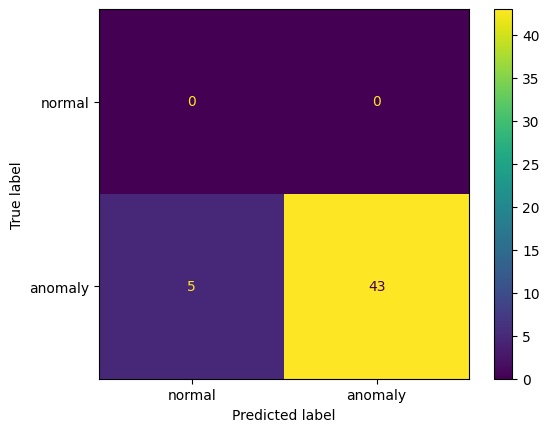

In [33]:
### Evaluation metrics

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, average_precision_score, ConfusionMatrixDisplay


# Calculate precision
precision = precision_score(y_true_all, y_pred_all)
print(f'Precision: {precision:.4f}')

# Calculate recall
recall = recall_score(y_true_all, y_pred_all)
print(f'Recall: {recall:.4f}')

# # Calculate average precision
# average_precision = average_precision_score(y_true_all, y_pred_all)
# print(f'Average Precision: {average_precision:.4f}')

# Calculate F1 score
f1 = f1_score(y_true_all, y_pred_all)
print(f"F1 Score: {f1:.4f}")

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true_all, y_pred_all)
print("Confusion Matrix:")
print(conf_matrix)
if len(conf_matrix) == 1:
    conf_matrix = np.array([[0, 0], [0, conf_matrix[0][0]]])
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['normal', 'anomaly'])
disp.plot()

## Classwise Detections

In [34]:
classwise_fn = defaultdict(list)
classwise_tp = defaultdict(list)
gt_len = 0
for file_fn, file_gt in zip(all_fn, all_gt):
    fn = file_fn[1]
    gt = file_gt[1]
    for label in gt:
        if label in fn:
            classwise_fn[label[4]].append(label)
        else:
            classwise_tp[label[4]].append(label)
            # print('tp:', label)

    gt_len += len(gt)
    # print('file gt:', len(gt))
    # print('file fn:', len(fn))
    # print('\n')
    # break

total_fn = 0
total_tp = 0
keys = set(list(classwise_fn.keys()) + list(classwise_tp.keys()))
# print('keys:', keys)
for key in keys:
    print('class:', key)
    total_fn += len(classwise_fn[key])
    total_tp += len(classwise_tp[key])

    # print('not detected:', len(classwise_fn[key]))
    print('detected:', len(classwise_tp[key]))
    print('total anomalies:', len(classwise_fn[key])+len(classwise_tp[key]))
    print('\n')


# print('total fn+tp:', total_fn+total_tp)
# print('total gt:', gt_len)
assert total_fn+total_tp == gt_len, 'total fn+tp not equal to total gt'

class: 1
detected: 18
total anomalies: 23


class: 2
detected: 36
total anomalies: 36


class: 3
detected: 68
total anomalies: 68




In [ ]:
### number of events to take before and after the detection for cropping subsequence
BUFFER_EVENTS = 100

total_subseq_lens = [] 

for test_data, detections, test_label in all_detections:
    print(test_data, test_label)

    ### read traces
    trace = read_traces(test_data)
    # print('trace:', trace)    

    ### path for sub-sequences
    subseq_path = os.path.dirname(test_label).replace('labels', 'diag_subseq')
    # print(subseq_path)

    ### rules for subsequence
    # print('detections:', detections)
    timestamps = [x[1] for x in trace]
    timestamps = np.array(timestamps)
    # print('timestamps:', timestamps)

    all_subseq = []
    for det in detections:
        # print('detection:', det)
        var, ts, file_name = det
        lb_det, ub_det = ts

        # print('bounds:', lb_det, ub_det)
        lb_rel_ts = [abs(x-lb_det) for x in timestamps]
        # print('lb_rel_ts:', lb_rel_ts)
        lb_det_ind = np.argmin(lb_rel_ts)
        # print('lb_trace ind:', lb_det_ind)
        # print('lb_trace:', timestamps[lb_det_ind])

        ub_rel_ts = [abs(x-ub_det) for x in timestamps]
        # print('ub_rel_ts:', ub_rel_ts)
        ub_det_ind = np.argmin(ub_rel_ts)
        # print('ub_trace ind:', ub_det_ind)
        # print('ub_trace:', timestamps[ub_det_ind])

        # ### exact match using numpy (alternate implementation)
        # ub_trace = np.where(timestamps == ub_det)[0][0]
        # print('ub_trace ind:', ub_trace)
        # print('ub_trace:', timestamps[ub_trace])


        lb_trace_ind = lb_det_ind - BUFFER_EVENTS
        ub_trace_ind = ub_det_ind
        # print('lb_trace ind:', lb_trace_ind)
        # print('ub_trace ind:', ub_trace_ind)

        sub_seq = trace[lb_trace_ind:ub_trace_ind]

        all_subseq.append(sub_seq)

        ### save subsequence
        sub_seq_name = os.path.basename(test_data)+'_'+str(lb_trace_ind)+'-'+str(ub_trace_ind)+'.json'
        sub_seq_name = os.path.join(subseq_path,sub_seq_name)
        save_json(sub_seq, sub_seq_name)

        ### average length of subsequence
        total_subseq_lens += [len(sub_seq)]

        # break


    # break

avg_subseq_len = np.mean(total_subseq_lens)
print('average subsequence length:', avg_subseq_len)
median_subseq_len = np.median(total_subseq_lens)
print('median subsequence length:', median_subseq_len)
max_subseq_len = np.max(total_subseq_lens)
print('max subsequence length:', max_subseq_len)

../../trace_data/theft_protection/single_thread/version_3/faulty_data/trace_trial1 ../../trace_data/theft_protection/single_thread/version_3/faulty_data/labels/trace_trial1_labels.json
../../trace_data/theft_protection/single_thread/version_3/faulty_data/trace_trial2 ../../trace_data/theft_protection/single_thread/version_3/faulty_data/labels/trace_trial2_labels.json
../../trace_data/theft_protection/single_thread/version_3/faulty_data/trace_trial3 ../../trace_data/theft_protection/single_thread/version_3/faulty_data/labels/trace_trial3_labels.json
average subsequence length: 151.06976744186048
median subsequence length: 139.0
max subsequence length: 359


In [99]:
avg_subseq_len

136.76470588235293

## Trace Plot

In [100]:
num_trace = []
time_stamp = []
for (t, ts) in sub_seq:
    num_trace.extend([t])
    time_stamp.extend([ts])
    # ### take limited samples
    # if ts > 250000:
    #     break

In [101]:
plot_data = dict()
plot_data['time'] = time_stamp   ### x_data
plot_data['subseq'] = num_trace   ### y_data (traces)

########## process the traces ###########
df_trace = pd.DataFrame(plot_data, columns=['time', 'subseq'])

In [102]:
trace_obj = plot_single_trace(df_trace, var_list, with_time=False, is_xticks=True)
trace_obj.show()